# Assignment Instructions
## Completing the Assignment  
1. Fill in your STUDENTID (abc123) in the code block below.
2. Make sure you fill in any place that says `#YOUR CODE HERE` or "YOUR ANSWER HERE"
3. When filling in `#YOUR CODE HERE` sections, remove or comment out the line  
> `raise NotImplementedError()`  

## Assignment Submission Checklist  
Before you submit this assignment for grading, you must do the following or you risk losing points. 
1. **Remove Extraneous prints** Long prints _might_ confuse the grader. If they do, you lose points.
2. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
3. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).  
  - If any cell that contains code throws an exception or does not compile, fix it and restart this checklist 
  - If a grading cell throws an exception, you will not recieve any credit for that cell
4. **Save the notebook** This ensures that any graphs or plots are in the submission   
  - Do NOT rename your notebook. It must have the same name that was downloaded, or the grading will fail.  
5. **Zip up the assignment notebook(s) and any files required to run the notebook**
  - You must name the zip file "ASnn.zip" where nn is the zero padded assignment number. This is the same file name used to download the assignment.  
  - All files must be in the root of the zip file, NOT in a subdirectory

By submitting this notebook for grading, you affirm that all work was produced by the author identified below, and that references are included for all use of public source material (to include code, data, diagrams, pictures, and verbatim text).

In [1]:
STUDENTID = "tfs436"

---

# AS02: Accessing NOAA Weather and Solar Data
**Version:**  1.3  
**Total Points:**  5  

## Objective
The objective of this assignment is to become familiar with the weather and solar data available from the **National Oceanic and Atmospheric Administration** (NOAA), and to write simple utility functions for accessing the data and metadata.

## Data Sources
NOAA has an ongoing data collection and archiving program that is well organized, well documented, and publicly available. Data used in this assignment is available via anonymous FTP at the following locations:
- ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year
- ftp.ncdc.noaa.gov/pub/data/nsrdb-solar
[Terms of use](https://www.ncdc.noaa.gov/ghcnd-data-access) for the data include "free and unrestricted use in research, education, and other non-commercial activities."

The relevant data sources for this exercise have been copied to the read-only Datasets directory (location is identified by the environment variable DATASETS_ROOT).

## References

###### Ref1
Menne, M.J., I. Durre, R.S. Vose, B.E. Gleason, and T.G. Houston, 2012:  An overview of the Global Historical Climatology Network-Daily Database.  Journal of Atmospheric and Oceanic Technology, 29, 897-910, doi:10.1175/JTECH-D-11-00103.1.



## Instructions
The first step in any data science exercise is become familiar with the data that you will be using. This includes:
- locating data sources
- obtaining copies of (or remote access to) the data
- understanding how the data is organized
- understanding the data attributes, collection methods, and any potential difficulties

The work required has been subdivided into the following general tasks.  
1) look through the data directories and become familiar with the data files and data formats.  
2) write a set of utility functions to access the weather and solar stations metadata  
3) along the way, answer some basic questions about the data collection stations  

Be sure to read the instructions and guidelines provided for each function.  The number of points earned is in parenthesis next to the description in the table of contents below.

[Setup](#Setup)  

[Reading and Organizing Metadata](#Reading-and-Organizing-Metadata) 
- [Read the countries and states files](#Read-the-countries-and-states-files) (0.2)  
- [Read the weather stations file](#Read-the-weather-stations-file) (0.4)  
- [Find weather stations that match criteria](#Find-weather-stations-that-match-criteria) (0.4)  
- [Read the solar stations file](#Read-the-solar-stations-file) (1)    
- [Find solar stations that match criteria](#Find-solar-stations-that-match-criteria) (1)     
- [Visualizing station locations](#Visualizing-station-locations)      

[Reading Data](#Reading-Data)    
- [Reading Weather Data](#Reading-Weather-Data) (1)  
- [Reading Solar Data](#Reading-Solar-Data) (1)  

[Save some results for next time](#Save-some-results-for-next-time)


## Setup
This section must be run to initialize everything.

[Back to Instructions](#Instructions)

In [2]:
# Imports and globals for this exercise
# mainline tools
import os
import re
# data tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import mplleaflet
# utility functions to save and read a dataframe for later use
# The DSPIClassUtilities.py file is included in the assignment zip.
import DSIPClassUtilities as utl

# Setup notebook for interactive graphics
%matplotlib notebook

# Set paths to directories for the NOAA data
dataroot = os.environ['DATASETS_ROOT']
WeatherDir = os.path.join(dataroot, 'NOAA/ghcn/daily')
SolarDir   = os.path.join(dataroot, 'NOAA/nsrdb-solar/solar-only')

# place to save temporary data and avoid lengthy reprocessing
TmpSaveDir = './_tmp' 
if not os.path.exists(TmpSaveDir):
    os.makedirs(TmpSaveDir)

# Document the paths and selectors
print('Paths and data for this exercise')
print('--------------------------------')
print('Path to weather data: {}'.format(WeatherDir))
print('Path to solar data:   {}'.format(SolarDir))
print('Temp files saved to:  {}'.format(TmpSaveDir))    

Paths and data for this exercise
--------------------------------
Path to weather data: \\adfs01\datasets\NOAA/ghcn/daily
Path to solar data:   \\adfs01\datasets\NOAA/nsrdb-solar/solar-only
Temp files saved to:  ./_tmp


## Reading and Organizing Metadata
The metadata for both the weather and solar energy data is contained in several text files. The formats for these files are in various documentation files in the associated directories. The requirement is to write utility functions to access the countries, states, and stations information. All utility functions must return their data as a pandas dataframe. The utilities must use a common set of column headers, documented in each function, rather than the headers native to the data.
- Columns must have an appropriate data type
- For columns that contain strings, blanks must not be interpreted as NaN's (they must be empty strings)
- The descriptions for the files indicate special values that are used for NaN's
- When returning a partial dataframe, unless the index is significant, it is often useful to reset the numbering.
- Some files are CSV while others are fixed width text

### Read the countries and states files
These functions must read the files: `ghcnd-countries.txt` and `ghcnd-states.txt`  
Write the body for the following functions.
- Each function must return a Pandas Series
- The index of both series must be the name 'Code'
- Set the name of the first series to 'Country' and the second series to 'State'
- The correct shapes will be (219,) and (74,) respectively

[Back to Instructions](#Instructions)

In [3]:
def ghcn_read_countries( WeatherDir ):
    '''
    Read the countries list from the NOAA ghcn daily folder
    and return the information in a Pandas Series.
    '''
    country_file = os.path.join(WeatherDir,'ghcnd-countries.txt')
    df = pd.read_fwf(country_file,index_col=False,
                     keep_default_na=True, 
                     names=['Code','Country'])
    df.set_index('Code', inplace=True)
    return df['Country']
    
def ghcn_read_states( WeatherDir ):
    '''
    Read the states list from the NOAA ghcn daily folder
    and return the information in a Pandas Series.
    '''
    state_file = os.path.join(WeatherDir,'ghcnd-states.txt')
    df = pd.read_fwf(state_file,index_col=False,
                     keep_default_na=True, 
                     names=['Code','State'])
    df.set_index('Code', inplace=True)
    return df['State']

In [4]:
# Take a look at the countries data
ghcn_read_countries(WeatherDir).head(5)

Code
AC     Antigua and Barbuda
AE    United Arab Emirates
AF             Afghanistan
AG                 Algeria
AJ              Azerbaijan
Name: Country, dtype: object

In [5]:
# Take a look at the states data
ghcn_read_states( WeatherDir ).head(5)

Code
AB           ALBERTA
AK            ALASKA
AL           ALABAMA
AR          ARKANSAS
AS    AMERICAN SAMOA
Name: State, dtype: object

In [6]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Use the defined functions
srCountries = ghcn_read_countries(WeatherDir)
srStates = ghcn_read_states( WeatherDir )

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert srCountries.shape == (219,)
assert srCountries.index.name == 'Code'
assert srCountries['US'] == 'United States'
assert srStates.shape == (74,)
assert srStates.name == 'State'
assert srStates['AK'] == 'ALASKA'
                          

### Read the weather stations file
Write a body for the following functions.
- Given the base directory, this function must read the `ghcnd-stations.txt` file
- The function must return a Pandas dataframe
- note that missing elevations are recorded as -999.9, which must be converted to a NaN
- Change the row index to be the weather station id as a string with name 'WeatherStnId'
- The dataframe must have the following column names and data types. The intent is to have column names that are a little more meaningful.
  - 'Latitude' (float), 'Longitude' (float), 'Elevation_m'(float),
  - 'State' (string), 'StationName' (string), 'GSNFlag' (boolean), 'HCNCat' (category), 'WMOId' (float)
- For the 'WMOId' column, blank values should be interpreted as NaN
  - consider reading the column as a string then converting it using pd.to_numeric with errors='coerce'
    
[Back to Instructions](#Instructions)    

In [7]:
def ghcn_read_stations( WeatherDir ):
    '''
    Read the weather stations list from the NOAA ghcn daily folder.
    '''
    widths = [12,9,10,7,3,31,4,4,5]
    stations_file = os.path.join(WeatherDir,'ghcnd-stations.txt')
    df = pd.read_fwf(stations_file,index_col=False,keep_default_na=False,
                     na_values = '-999.9',widths = widths,
                     names=['WeatherStnId','Latitude','Longitude','Elevation_m',
                            'State','StationName','GSNFlag','HCNCat','WMOld'],
                    dtype={'State':str,'StationName':str,'HCNCat':'category','WMOld':str})
    df['GSNFlag'].replace({'GSN':True,'':False}, inplace=True)
    df['WMOld'] = pd.to_numeric(df['WMOld'], errors='coerce')
    df.set_index('WeatherStnId', inplace=True)
    return df

In [28]:
# Whenever you want to test a function as you build it, consider adding a code cell 
# and using some of the standard Pandas summary functions to examine your results.
dfWeatherStations = ghcn_read_stations(WeatherDir)
#dfWeatherStations.dtypes
dfWeatherStations.head
#dfWeatherStations.HCNCat.cat.categories.to_list()
#dfWeatherStations[111550:111580]
dfWeatherStations.describe()
#dfWeatherStations.loc['ZI000067761',:]


,Latitude,Longitude,Elevation_m,WMOld
count,113951.000000,113951.000000,109330.000000,8086.000000
mean,24.390079,-39.305406,508.466695,55453.409721
std,29.384920,92.375192,610.272579,26427.929865
min,-90.000000,-179.983000,-350.000000,1001.000000
25%,18.166700,-100.749100,100.900000,34117.750000
50%,36.302200,-83.500000,270.000000,60368.000000
75%,42.816900,14.790000,643.100000,72572.750000
max,83.650000,179.320000,5033.000000,99999.000000


In [9]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Use the defined functions
dfWeatherStations = ghcn_read_stations(WeatherDir)

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert dfWeatherStations.shape == (113951, 8)
assert np.isnan(dfWeatherStations.at['ASN00004001','Elevation_m'])
assert pd.api.types.is_float_dtype(dfWeatherStations['Latitude'])
assert pd.api.types.is_float_dtype(dfWeatherStations['Longitude']) 
assert pd.api.types.is_string_dtype(dfWeatherStations['StationName'])
assert pd.api.types.is_bool_dtype(dfWeatherStations['GSNFlag'])
assert sorted(dfWeatherStations.HCNCat.cat.categories.to_list()) == sorted(['', 'CRN', 'HCN'])


### Find weather stations that match criteria
See the function documentation for the criteria  
- this must return a pandas dataframe

[Back to Instructions](#Instructions)

In [10]:
def ghcn_find_stations( dfw, station='', state=''):
    '''
    Find one or more stations in the NOAA ghcn data whose station name
    contains a given string and optionally matches a specified state.
    dfw     - the dataframe result from ghcn_read_stations(). 
    station - optional string. If supplied, find this anywhere in the StationName column. Ignore case.
              Raise a ValueError exception if this is not a string
    state   - optional text string containing the two letter state designation. 
              Raise a ValueError exception if this is not a string of exactly 2 letters.
    '''
    if station != '':
        if not isinstance(station, str) or station.isnumeric():
            raise ValueError
        dfw = dfw[dfw.StationName.str.contains(station,case=False)]
                
    if state != '':
        if not isinstance(state, str):
            raise ValueError
        if state.isnumeric() or len(state) != 2:
            raise ValueError
        else:
            dfw = dfw[dfw.State.str.contains(state,case=False)]
        
    return dfw

In [11]:
# Just for fun. 
# If we wanted to find international airports, we might consider finding
# "intl" or " intl" in the station name. Is there a difference in these two?
l1 = ghcn_find_stations( dfWeatherStations, station=" intl" )['StationName'].values      
l2 = ghcn_find_stations( dfWeatherStations, station="intl" )['StationName'].values 
# This will list all the stations in l2 that are not in l1
[x for x in l2 if x not in l1]


['LINTLAW',
 'ESCUINTLA (DGE)',
 'MOTOZINTLA (SMN)',
 'ESCUINTLA (SMN)',
 'MOTOZINTLA (DGE)',
 'NANZINTLA (CFE)',
 'NANCINTLA',
 'HUAJINTLAN',
 'SANTIAGO IXCUINTLA',
 'ATZITZINTLA',
 'TEPETZINTLA DE GALEANA',
 'MATZACINTLA (CFE)',
 'COATZINTLA']

In [12]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Use the defined functions
dfWeatherStations = ghcn_read_stations(WeatherDir)

# Public tests
# ---------------------------------------------------------
sStation = "San Antonio"
sState = "tx"
assert (74, 8) == ghcn_find_stations( dfWeatherStations, station=sStation ).shape
assert (34, 8) == ghcn_find_stations( dfWeatherStations, station=sStation, state=sState).shape
try:
    ghcn_find_stations( dfWeatherStations, state='12' )
except ValueError:
    pass
else:
    raise AssertionError("Did not raise exception for state containing non-characters")


### Read the solar stations file
This function must read the file `NSRDB_StationsMeta.csv`  
Write a body for the following functions.
- The function must return a Pandas dataframe
- note that missing elevations are recorded as -999.9, which must be converted to a NaN
- Change the row index to be the solar station id as a string with name 'SolarStnId'
- There are two geographic locations for each station. Consult the documentation to understand the difference. Include only the columns that give the actual measurement location if that location is different than the station location.
- The dataframe must have the following column names and data types. The intent is to have column names that are consistent with the weather data stations.
  - 'SiteClass' (category), 'SolarFlag' (bool), 'StationName' (string), 'State' (string), 
  - 'Latitude' (float), 'Longitude' (float), 'Elevation_m' (float), 'TimeZoneOffset' (float)
  
[Back to Instructions](#Instructions)  

In [13]:
def nsrb_read_stations( SolarDir ):
    '''
    Read the solar stations list from the NOAA nsrb folder.
    The column names are intended to be consistent with the weather functions
    '''
    solar_file = os.path.join(SolarDir,'documentation','NSRDB_StationsMeta.csv')
    df = pd.read_csv(solar_file,index_col=False,keep_default_na=False,skiprows = 1,
                     na_values = '-999.9',usecols = [0,1,2,3,4,5,6,7,8],
                     names=['SolarStnId','SiteClass','SolarFlag','StationName','State',
                            'Latitude','Longitude','Elevation_m','TimeZoneOffset'],
                    dtype={'SolarStnId':str,'SiteClass':'category','SolarFlag':bool,'StationName':str,'State':str,
                            'Elevation_m':float,'TimeZoneOffset':float})
    df.set_index('SolarStnId', inplace=True)
    return df

In [14]:
# Take a look at the data
nsrb_read_stations( SolarDir ).head(20)
#dfSolarStations.SiteClass.cat.categories.to_list()

,SiteClass,SolarFlag,StationName,State,Latitude,Longitude,Elevation_m,TimeZoneOffset
SolarStnId,,,,,,,,
690140,3,False,EL TORO MCAS,CA,33.667,-117.733,116.0,-8.0
690150,2,False,TWENTYNINE PALMS,CA,34.300,-116.167,626.0,-8.0
690160,3,False,TUSTIN MCAF,CA,33.700,-117.833,18.0,-8.0
690190,2,False,ABILENE DYESS AFB,TX,32.433,-99.850,545.0,-6.0
690230,2,False,WHIDBEY ISLAND NAS,WA,48.350,-122.667,10.0,-8.0
699604,2,False,YUMA MCAS,AZ,32.650,-114.617,65.0,-7.0
700197,3,False,SELAWIK,AK,66.600,-160.000,8.0,-9.0
700260,2,True,BARROW W POST-W ROGERS ARPT [NSA - ARM],AK,71.320,-156.620,10.0,-9.0
700300,3,False,WAINWRIGHT LIZ 3,AK,70.617,-159.850,27.0,-9.0


In [15]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Use the defined functions
dfSolarStations = nsrb_read_stations( SolarDir )

# Public tests (make sure your function passes these tests)
# ---------------------------------------------------------
assert dfSolarStations.Latitude.dtype == 'float64'
assert pd.api.types.is_float_dtype(dfSolarStations['Latitude'])
assert pd.api.types.is_float_dtype(dfSolarStations['Longitude']) 
assert pd.api.types.is_string_dtype(dfSolarStations['StationName'])
assert sorted(dfSolarStations.SiteClass.cat.categories.to_list()) == sorted(['1', '2', '3'])
assert (1454, 8) == dfSolarStations.shape


### Find solar stations that match criteria
See the function documentation for the criteria 
- this must return a pandas dataframe

[Back to Instructions](#Instructions)

In [16]:
def nsrb_find_stations( dfs, station='', state='', solar=''):
    '''
    Find one or more stations in the NOAA nsrb solar data whose station name
    contains a given string and optionally matches a specified state.
    dfs     - the dataframe result from nsrb_read_stations()
    station - optional string. If supplied, find this anywhere in the StationName column. Ignore case.
              Raise a ValueError exception if this is not a string
    state   - optional string containing the two letter state designation.
              Raise a ValueError exception if this is not a string of exactly 2 letters.
    solar   - optional bool. If true, only include sites with measured data.
              If false, include only sites with modeled data.
    '''
    if station != '':
        if not isinstance(station, str):
            raise ValueError
        if type(station) is str:
            dfs = dfs[dfs.StationName.str.contains(station,case=False)]
        else:
            raise ValueError
        
    if state != '':
        if not isinstance(state, str):
            raise ValueError
        if state.isnumeric() or type(state) != str or len(state) != 2:
            raise ValueError
        else:
            dfs = dfs[dfs.State.str.contains(state,case=False)]
    if solar != '':
        if not isinstance(solar, bool):
            raise ValueError
        if type(solar) is bool:
            dfs = dfs[dfs.SolarFlag==solar]
        else:
            raise ValueError
        
    return dfs

In [17]:
# check it out
nsrb_find_stations( dfSolarStations, station='INTL', solar=True )

,SiteClass,SolarFlag,StationName,State,Latitude,Longitude,Elevation_m,TimeZoneOffset
SolarStnId,,,,,,,,
722506,2,True,MCALLEN MILLER INTL AP [EDINBURG - UT],TX,26.31,-98.17,30.0,-6.0
722510,1,True,CORPUS CHRISTI INTL ARPT [UT],TX,27.88,-97.63,6.0,-6.0
722520,2,True,LAREDO INTL AP [UT],TX,27.57,-99.49,142.0,-6.0
723650,1,True,ALBUQUERQUE INTL ARPT [ISIS],NM,35.04,-106.62,1619.0,-7.0
725895,2,True,KLAMATH FALLS INTL AP [UO],OR,42.22,-121.74,1220.0,-8.0
725970,1,True,MEDFORD ROGUE VALLEY INTL AP [ASHLAND - UO],OR,42.19,-122.70,595.0,-8.0
727686,2,True,WOLF POINT INTL [FORT PECK - SURFRAD],MT,48.31,-105.10,634.0,-7.0


In [18]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
sStation = "San Antonio"
sState = "tx"
assert (3, 8) == nsrb_find_stations( dfSolarStations, station=sStation ).shape
assert (10, 8) == nsrb_find_stations( dfSolarStations, state=sState, solar=True).shape
assert 'AUSTIN MUELLER MUNICIPAL AP [UT]' == nsrb_find_stations( dfSolarStations, state=sState, solar=True).at['722540','StationName']

try:
    nsrb_find_stations( dfSolarStations, state='12' )
except ValueError:
    pass
else:
    raise AssertionError("Did not raise exception for state containing non-characters")


### Visualizing station locations
The following function plots solar and weather station locations on a map. The map will pop up in a new tab in the browser.
- weather station locations are in red
- solar station locations are in blue

[Back to Instructions](#Instructions)

In [19]:
def leaf_map_stations( dfw='', dfs='' ):
    # Create a plot figure
    fig = plt.figure()
    # first the weather stations
    if not isinstance(dfw, str):
        lons = dfw['Longitude'].tolist()
        lats = dfw['Latitude'].tolist()
        labels = dfw['StationName'].tolist()
        plt.scatter(lons, lats, c='r', marker='o', label=labels, alpha=0.5, s=100)
    # second the solar stations
    if not isinstance(dfs, str):    
        lons = dfs['Longitude'].tolist()
        lats = dfs['Latitude'].tolist()
        labels = dfs['StationName'].tolist()
        plt.scatter(lons, lats, c='b', marker='v', label=labels, alpha=0.5, s=100)
    # show the map in a new tab
    mplleaflet.show()
    #This used to put the map in the output section, but doesn't seem to work now.
    #mplleaflet.display(fig=fig)
    return


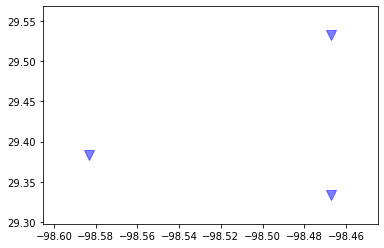

In [20]:
# Just for fun
# use your station location functions to find
# - weather stations with a name that include "San Antonio"
# - all solar stations that have measured solar data
# Plot them

dfw = ghcn_find_stations( dfWeatherStations, station = 'STATE COLLEGE [PENN STATE - SURFRAD]' )
dfs = nsrb_find_stations( dfSolarStations,station = 'San Antonio')
lons = dfs['Longitude'].tolist()
lats = dfs['Latitude'].tolist()
labels = dfs['StationName'].tolist()
plt.scatter(lons, lats, c='b', marker='v', label=labels, alpha=0.5, s=100)
#leaf_map_stations( dfw, dfs )


## Reading Data
The weather and solar energy data resides in multiple files. You will need to explore the directories under Datasets\NOAA. Documentation for the file formats is located with the data.  

[Back to Instructions](#Instructions)

### Reading Weather Data
We will be using the compressed files in the by_year directory. Hint: pd.read_csv() can access compressed files directly if given the appropriate parameter.

Note the following instructions:
- return the data as a pandas dataframe
- when reading a file, ignore the last column (TIME)
- For columns that contain strings or categories, blanks should not be interpreted as NaN's
- The dataframe must have the following column names and data types:
  - 'WeatherStnId' (string), 'Date' (datetime), 'Element' (string), 'Value' (float),
    'MFlag' (category), 'QFlag' (category), 'SFlag' (category), 'Year' (int), 'Month' (int), 'Day' (int)
  - note that the 'Date' column must be converted from a string to a pandas datetime.  
  - use the 'Date' to generate the last three columns. They will make lookup easier for future use.
- The data for PRCP, TMIN, TMAX, and TAVG is recorded in the files as integer tenths of a mm or tenths of a degree. You will need to scale this to be just mm or degC


[Back to Instructions](#Instructions)

In [21]:
def ghcn_read_weather_byyear( WeatherDir, year ):
    '''
    Read the gchn data for a given year from the by_year directory.
    See the Readme.txt file for the names of all available measurements.
    The most commonly used measurements include the following. This
    function has scaled the raw data to the units shown below.
        PRCP = Precipitation (mm)
        SNOW = Snowfall (mm)
        SNWD = Snow depth (mm)
        TMAX = Maximum temperature (degrees C)
        TMIN = Minimum temperature (degrees C)
        TAVG = Average temperature (degrees C)
    '''
    year_file = os.path.join(WeatherDir,'by_year',str(year)+'.csv.gz')
    df = pd.read_csv(year_file,index_col=False,keep_default_na=False,
                     na_values = '-999.9',usecols = [0,1,2,3,4,5,6],compression = 'gzip',
                     names=['WeatherStnId','Date','Element','Value',
                            'MFlag','QFlag','SFlag'],parse_dates = ['Date'],
                    dtype={'WeatherStnId':str,'Element':str,'Value':float,
                            'MFlag':'category','QFlag':'category','SFlag':'category'})
    df['Year'], df['Month'],df['Day'] = df['Date'].dt.year, df['Date'].dt.month,df['Date'].dt.day
    df.loc[df['Element'].isin(['PRCP','TMIN','TMAX','TAVG']), ['Value']] /= 10
    return df


In [22]:
# Take a look at the data
# This can take a while to execute for years with lots of data. 
# For time's sake, use 1890 for testing
ghcn_read_weather_byyear( WeatherDir, 1890 ).head(20)


,WeatherStnId,Date,Element,Value,MFlag,QFlag,SFlag,Year,Month,Day
0,ASN00040101,1890-01-01,PRCP,0.0,,,a,1890,1,1
1,CA006144470,1890-01-01,TMAX,2.2,,,C,1890,1,1
2,CA006144470,1890-01-01,TMIN,-6.1,,,C,1890,1,1
3,CA006144470,1890-01-01,SNOW,0.0,T,,C,1890,1,1
4,CA006119064,1890-01-01,TMAX,2.8,,,C,1890,1,1
5,CA006119064,1890-01-01,TMIN,-9.4,,,C,1890,1,1
6,CA006119064,1890-01-01,PRCP,0.0,,,C,1890,1,1
7,CA006119064,1890-01-01,SNOW,0.0,,,C,1890,1,1
8,ASN00072093,1890-01-01,PRCP,0.0,,,a,1890,1,1
9,ASN00069013,1890-01-01,PRCP,0.0,,,a,1890,1,1


In [23]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Use the defined functions
dfwd = ghcn_read_weather_byyear( WeatherDir, 1890 )

# Public tests
# ---------------------------------------------------------
assert (1236956, 10) == dfwd.shape
assert sorted(dfwd.columns.values) ==  sorted(['WeatherStnId', 'Date', 'Element', 'Value',
                                               'MFlag', 'QFlag', 'SFlag', 'Year', 'Month', 'Day'])
assert pd.api.types.is_categorical_dtype(dfwd['MFlag'])
np.testing.assert_almost_equal(dfwd.at[1236954,'Value'], -12.0, decimal=1, err_msg='Almost equality failed', verbose=True)


### Reading Solar Data
Be sure to consult the _NSRDB data dictionary(Solar only).doc_ file for explanations of the various fields. 

Note the following instructions:
- Return the data as a pandas dataframe. 
- If the given year and station id do not exist, raise a ValueError exception
- The descriptions for the files indicate special values that are used for NaN's
- For columns that contain strings or categories, blanks should not be interpreted as NaN's
- The 'Date' column must be converted from a string to a pandas datetime.  
- In addition to the columns found in the file:
  - use the 'Date' field to generate three new columns: 'Year' (int), 'Month' (int), 'Day' (int)
  - add a SolarStnId column as a string
- The default column names are not that great since they contain unusual characters and spaces. Use the following names instead. Note that several columns from the file have been omitted. 

| NSRDB Col Name   | Name to use   | data type | field number |
| :-------------   | :----------   | :-------- | -----------: |
| YYYY-MM-DD       | Date          | datetime | 1 |
| HH:MM (LST)      | Time_LST      | string | 2 |
| Zenith (deg)     | Zenith_deg    | float | 3 |
| Azimuth (deg)    | Azimuth_deg   | float | 4 |
| ETR (W/m^2)      | ETR_Wpm2      | float | 5 |
| ETRN (W/m^2)     | ETRN_Wpm2     | float | 6 |
| Glo Mod (W/m^2)  | GloMod_Wpm2   | float | 7 |
| Glo Mod Unc (%)  | GloModUnc_pct | float | 8 |
| Glo Mod Source   | GloModSrc     | float | 9 |
| Dir Mod (W/m^2)  | DirMod_Wpm2   | float | 10 |
| Dir Mod Unc (%)  | DirModUnc_pct | float | 11 |
| Dir Mod Source   | DirModSrc     | float | 12 |
| Dif Mod (W/m^2)  | DifMod_Wpm2   | float | 13 |
| Dif Mod Unc (%)  | DifModUnc_pct | float | 14 |
| Dif Mod Source   | DifModSrc     | float | 15 |
| Meas Glo (W/m^2) | MeasGlo_Wpm2  | float | 16 |
| Meas Glo Flg     | MeasGloQualFlg| int   | 17 |
| Meas Dir (W/m^2) | MeasDir_Wpm2  | float | 18 |
| Meas Dir Flg     | MeasDirQualFlg | int | 19 |
| Meas Dif (W/m^2) | MeasDif_Wpm2 | float | 20 |
| Meas Dif Flg     | MeasDifQualFlg | int | 21 |


[Back to Instructions](#Instructions)

In [24]:
def nsrb_read_solar_byyear(SolarDir, stationid, year):
    '''
    Reads the solar data for a single station for a given year.
    Assumes the NOAA nsrb data has been unzipped into directories
    with the station id as the directory name.
    '''    
    solar_byyear_file = os.path.join(SolarDir,'nsrdb_solar',stationid,str(stationid)+'_'+str(year)+'.csv')
    if os.path.isfile(solar_byyear_file):
        df = pd.read_csv(solar_byyear_file,index_col=False,keep_default_na=False,skiprows = 1,
                         na_values = '-9900',usecols = np.arange(0,21,1),
                         names=['Date','Time_LST','Zenith_deg','Azimuth_deg','ETR_Wpm2',
                                'ETRN_Wpm2','GloMod_Wpm2','GloModUnc_pct','GloModSrc',
                                'DirMod_Wpm2','DirModUnc_pct','DirModSrc','DifMod_Wpm2',
                                'DifModUnc_pct','DifModSrc','MeasGlo_Wpm2','MeasGloQualFlg',
                                'MeasDir_Wpm2','MeasDirQualFlg','MeasDif_Wpm2','MeasDifQualFlg'],
                         dtype = {'Time_LST':str,'Zenith_deg':float,'Azimuth_deg':float,'ETR_Wpm2':float,
                                'ETRN_Wpm2':float,'GloMod_Wpm2':float,'GloModUnc_pct':float,'GloModSrc':float,
                                'DirMod_Wpm2':float,'DirModUnc_pct':float,'DirModSrc':float,'DifMod_Wpm2':float,
                                'DifModUnc_pct':float,'DifModSrc':float},
                         parse_dates = ['Date'])
        df['Year'], df['Month'],df['Day'] = df['Date'].dt.year, df['Date'].dt.month,df['Date'].dt.day
        df['SolarStnId'] = stationid
        return df
    else:
        raise ValueError

In [25]:
# Take a look at the data
nsrb_read_solar_byyear(SolarDir, '744860', 1999).dtypes

Date              datetime64[ns]
Time_LST                  object
Zenith_deg               float64
Azimuth_deg              float64
ETR_Wpm2                 float64
ETRN_Wpm2                float64
GloMod_Wpm2              float64
GloModUnc_pct            float64
GloModSrc                float64
DirMod_Wpm2              float64
DirModUnc_pct            float64
DirModSrc                float64
DifMod_Wpm2              float64
DifModUnc_pct            float64
DifModSrc                float64
MeasGlo_Wpm2             float64
MeasGloQualFlg             int64
MeasDir_Wpm2             float64
MeasDirQualFlg             int64
MeasDif_Wpm2             float64
MeasDifQualFlg             int64
Year                       int64
Month                      int64
Day                        int64
SolarStnId                object
dtype: object

In [26]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Use the defined functions
dfsd = nsrb_read_solar_byyear(SolarDir, '744860', 1999)

# Public tests
# ---------------------------------------------------------
assert np.isnan(dfsd['MeasGlo_Wpm2'].mean())
np.testing.assert_almost_equal(dfsd['GloMod_Wpm2'].sum(), 1423446.0, decimal=1, err_msg='Almost equality failed', verbose=True) 
pd.api.types.is_int64_dtype(dfsd['MeasDirQualFlg'])


True

## Save some results for next time
[Back to Instructions](#Instructions)

In [27]:
# Save the complete metadata for the solar and weather stations
fn = utl.save_dataframe( dfWeatherStations, 'AS02-WeatherStations')
fn = utl.save_dataframe( dfSolarStations, 'AS02-SolarStations')

Saving to parquet file: ./AS02-WeatherStations.pqt
Saving to parquet file: ./AS02-SolarStations.pqt
